<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S10_C4_NLP_BasicStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar el texto

# [N-gram](https://nlp.stanford.edu/fsnlp/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
# Seleccionar un libro
text1



<Text: Moby Dick by Herman Melville 1851>

In [3]:
book = text1

In [4]:
book.tokens[1000:1010]

['said', 'that', 'he', 'was', 'one', 'of', 'six', 'who', 'had', 'killed']

# 1. Basic statistics
* Count
* Medida de riqueza léxica


In [5]:
#cuantos tokens ("Palabras entre comillas sencillas")
len(book)

260819

In [6]:
# ¿Cuantas palabras únicas hay en el libro?
len(set(text1))
#len(set(book))

19317

In [7]:
# Organiza en orden alfabetico las palabras
   # las primeras son los simbolos
sorted(set(book))
vocabulary = sorted(set(book))
vocabulary[1000:1010]

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts']

In [8]:
# Crear la funcion para calcular riqueza léxica
  # palabras unicas / total palabras
def riquesa_léxica(texto):
    return len(set(texto))/len(texto)

In [9]:
riquesa_léxica(book)

0.07406285585022564

In [10]:
book.count(".")

6862

In [11]:
# Crear la funcion de porcentaje de palabra

def token_percent(palabra,texto):
  token_count=texto.count(palabra)
  token_percent = 100*texto.count(palabra)/len(texto)
  return token_count, token_percent


In [12]:
token_percent(",", book)

(18713, 7.174707364110743)

# 2. FreqDist

In [13]:
fdist = FreqDist(book)

In [14]:
#¿Cuantas veces aparece los tokens enel texto?
# Opcion 1
fdist.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

<Axes: xlabel='Samples', ylabel='Counts'>

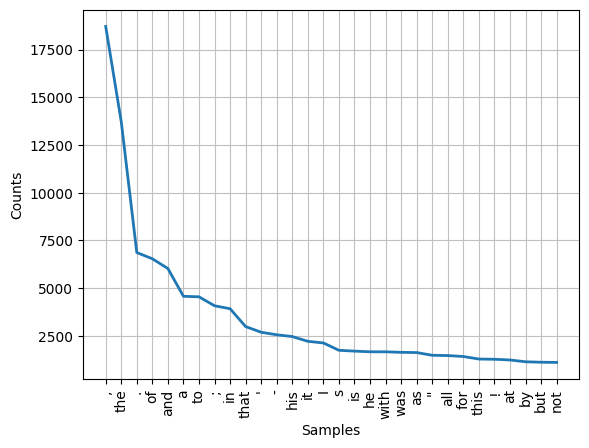

In [15]:
fdist.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

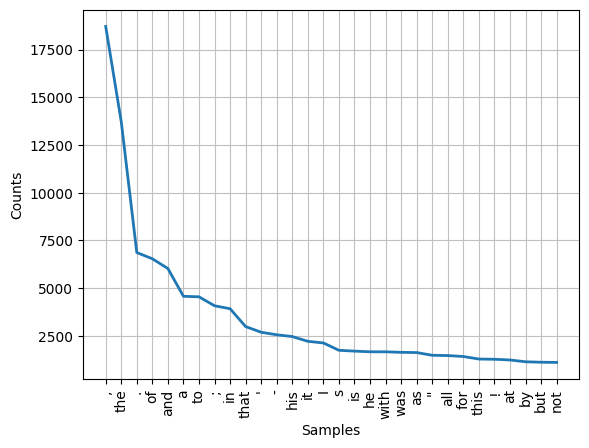

In [16]:
#¿Cuantas veces aparece los tokens enel texto?
# Opcion 2
book.vocab().most_common(10)
book.vocab().plot(30)

# Ley de ZIPF

Describe la relación entre la frecuencia de la palabra y su posición en una lista ordenadad e frecuencia.

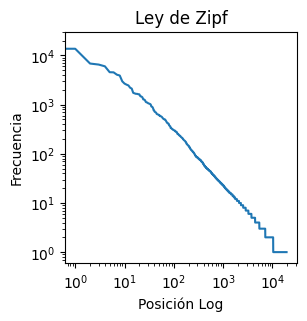

In [17]:
a = list(fdist.values())
a = np.array(a)
a = np.sort(a)
a = a[::-1]
plt.figure(figsize=(3,3))
plt.yscale('log')
plt.xscale('log')
plt.plot(a)
plt.xlabel("Posición Log")
plt.ylabel("Frecuencia")
plt.title("Ley de Zipf")
plt.show()

In [31]:
fdist = FreqDist(book)
#¿Cuantas veces aparece los tokens enel texto?
# Opcion 1
def apariciones(fdist):
  fdist.most_common(10)
  plt.figure(figsize=(8,2))
  fdist.plot(30, cumulative=False)
  return plt.show()
def frecuencia(fdist):
  a = list(fdist.values())
  a = np.array(a)
  a = np.sort(a)
  a = a[::-1]
  plt.figure(figsize=(3,3))
  plt.yscale('log')
  plt.xscale('log')
  plt.plot(a)
  plt.xlabel("Posición Log")
  plt.ylabel("Frecuencia")
  plt.title("Ley de Zipf")
  return plt.show()

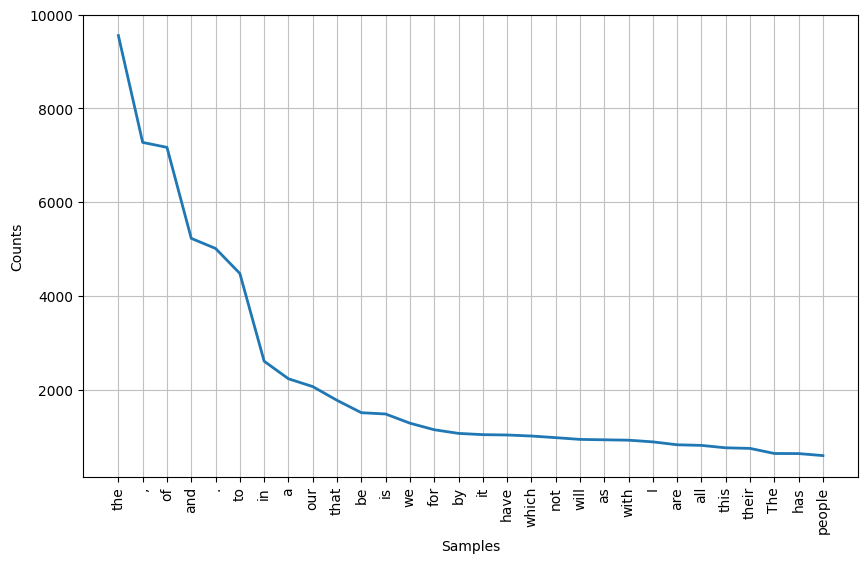

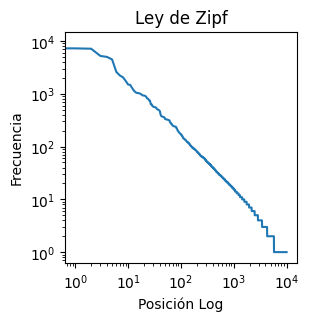

In [19]:
book = text4
fdist = FreqDist(book)
apariciones(fdist)
frecuencia(fdist)

* Figura 1:
* Figura 2:

## 2.2 Filtros

In [20]:
# filtrar las distribuciones

In [21]:
long_words = [word for word in book if len(word) > 5]
# limita la cantidad de caracteres a mayores que 5
 # len(word)>5 porque la mayoria de conectores en ingles tiene  hasta cuartro caracteres

In [22]:
book = text1
fdist = FreqDist(long_words)
fdist.most_common(10)

[('people', 589),
 ('Government', 334),
 ('States', 331),
 ('should', 320),
 ('country', 316),
 ('government', 264),
 ('nation', 243),
 ('citizens', 241),
 ('America', 240),
 ('public', 224)]

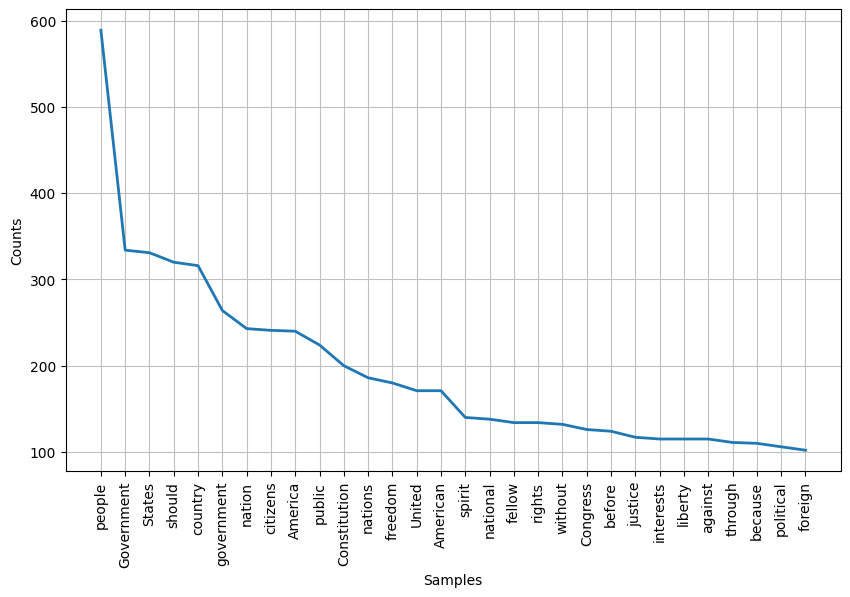

In [23]:
apariciones(fdist)
#frecuencia(fdist)

Pistas parte 1.

* Queequeg, Starbuck, Pequod: nombre
* Whales: ballenas
* voyage: viaje


las palabras que inician en mayúscula tienden a ser nombres o lugares...

genere un código para extraer las palabras que inician en mayúscula

In [24]:
import re
vector_mayusculas = [w for w in long_words if re.search(r'^[A-Z]', w)]
vector_mayusculas

['Fellow',
 'Citizens',
 'Senate',
 'Representatives',
 'Country',
 'Almighty',
 'United',
 'States',
 'Government',
 'Author',
 'Invisible',
 'United',
 'States',
 'President',
 'Heaven',
 'Heaven',
 'American',
 'Besides',
 'Constitution',
 'Instead',
 'Representatives',
 'Having',
 'Parent',
 'American',
 'Government',
 'Fellow',
 'Magistrate',
 'America',
 'Previous',
 'President',
 'Constitution',
 'Government',
 'America',
 'Relying',
 'Providence',
 'Revolutionary',
 'Confederation',
 'Batavian',
 'Helvetic',
 'Congress',
 'Negligence',
 'States',
 'States',
 'America',
 'Measures',
 'Constitution',
 'Government',
 'Employed',
 'Constitution',
 'United',
 'States',
 'Irritated',
 'States',
 'Claiming',
 'Executive',
 'Senate',
 'Congress',
 'Constitution',
 'Returning',
 'Constitution',
 'Chamber',
 'Congress',
 'Government',
 'Executive',
 'Legislature',
 'Government',
 'Government',
 'American',
 'America',
 'Houses',
 'Congress',
 'Constitution',
 'United',
 'States',
 'State

In [25]:
mayus_book = set([mayus for mayus in long_words if mayus.istitle()])
mayus_book

{'Abandonment',
 'Abhorring',
 'Abraham',
 'Abroad',
 'Accept',
 'Across',
 'Acting',
 'Action',
 'Actual',
 'Additional',
 'Address',
 'Administered',
 'Administration',
 'Administrations',
 'Advance',
 'Advancing',
 'Afghanistan',
 'Africa',
 'African',
 'Agriculture',
 'Alleghanies',
 'Almighty',
 'Almost',
 'Already',
 'Although',
 'Always',
 'Amelia',
 'America',
 'American',
 'Americanism',
 'Americans',
 'Americansâ',
 'Americanâ',
 'Americas',
 'Americaâ',
 'Amidst',
 'Amongst',
 'Annihilate',
 'Another',
 'Anthem',
 'Anthony',
 'Anxiety',
 'Anxious',
 'Anyone',
 'Apollo',
 'Appalachia',
 'Appreciating',
 'Apprehension',
 'Arbitration',
 'Archibald',
 'Argonne',
 'Arlington',
 'Armies',
 'Articles',
 'Asiatic',
 'Assessing',
 'Assistance',
 'Association',
 'Assuring',
 'Athens',
 'Atlantic',
 'Attention',
 'Augustine',
 'Author',
 'Baltimore',
 'Barbary',
 'Batavian',
 'Because',
 'Before',
 'Belief',
 'Believing',
 'Belleau',
 'Beneath',
 'Beneficent',
 'Bernardin',
 'Besides'

necesitamos filtrar las palabras que inician con mayúscula que no las precede un punto

# 3. N-Gram


In [26]:
# Palabras que ocurren de manera consecutiva
  # BIGRAM =  DE A DOS
book_bigrams = list(nltk.bigrams(book))
print(len(book_bigrams))
book_bigrams[:10]

260818


[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

In [32]:
fdist = FreqDist(book_bigrams) # cuantas veces aparece cada par
print(len(fdist))
fdist.most_common(10)

118748


[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

In [28]:
#apariciones(fdist)
#frecuencia(fdist)

In [29]:
th = 4
bigrams_words = [bigram for bigram in book_bigrams if len(bigram[0]) > th and len(bigram[1]) > th]
fdist = FreqDist(bigrams_words)
fdist.most_common(10)

[(('Sperm', 'Whale'), 118),
 (('White', 'Whale'), 74),
 (('sperm', 'whale'), 55),
 (('Right', 'Whale'), 38),
 (('Captain', 'Peleg'), 32),
 (('white', 'whale'), 31),
 (('cried', 'Stubb'), 23),
 (('these', 'things'), 22),
 (('cried', 'Starbuck'), 17),
 (('still', 'further'), 16)]

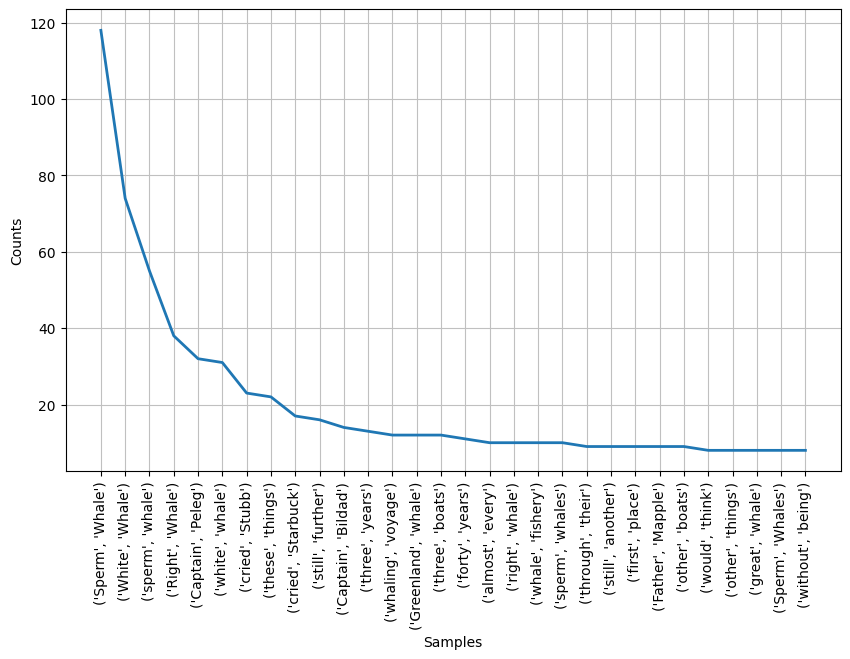

In [30]:
apariciones(fdist)

Pistas parte 1.

Queequeg, Starbuck, Pequod: nombre
Whales: ballenas
voyage: viaje

Pistas parte 2.
* white whales
* Sperm whale
* hay dos capitanes Starbuck, peleg y bildad
* dos persona lloran



Agrupacion de palabras repetidas


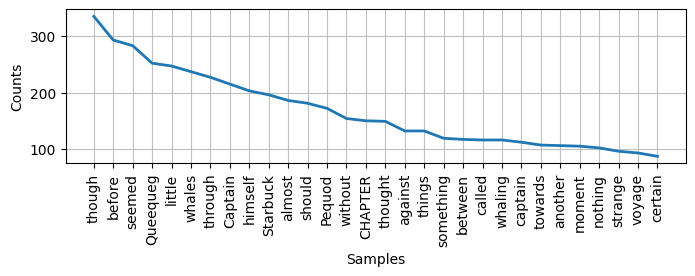

----------------------------------
lista de bigramas
260818
118748
----------------------------------
Agrupacion de bigramas repetidos


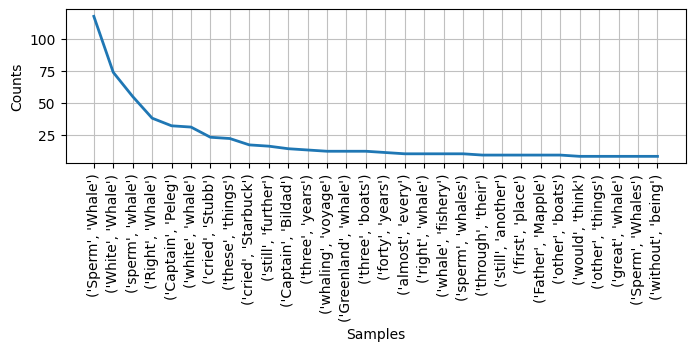

----------------------------------


In [43]:
book = text1
print("Agrupacion de palabras repetidas")
long_words = [word for word in book if len(word) > 5]
fdist = FreqDist(long_words)
#print(fdist.most_common(10))
apariciones(fdist)
#frecuencia(fdist)
print("----------------------------------")
print("lista de bigramas")
book_bigrams = list(nltk.bigrams(book))
print(len(book_bigrams))
book_bigrams[:10]
fdist = FreqDist(book_bigrams) # cuantas veces aparece cada par
print(len(fdist))
fdist.most_common(10)
#apariciones(fdist)
#frecuencia(fdist)
print("----------------------------------")
print("Agrupacion de bigramas repetidos")
th = 4
bigrams_words = [bigram for bigram in book_bigrams if len(bigram[0]) > th and len(bigram[1]) > th]
fdist = FreqDist(bigrams_words)
fdist.most_common(10)
apariciones(fdist)
#frecuencia(fdist)
print("----------------------------------")

Pista parte 1
action
really, people, welcome
ladies, watches, pleas, tonight
minutes, female, single, adult, virgin

Parte 2
action- waches
wanna girl


In [44]:
from nltk.util import ngrams

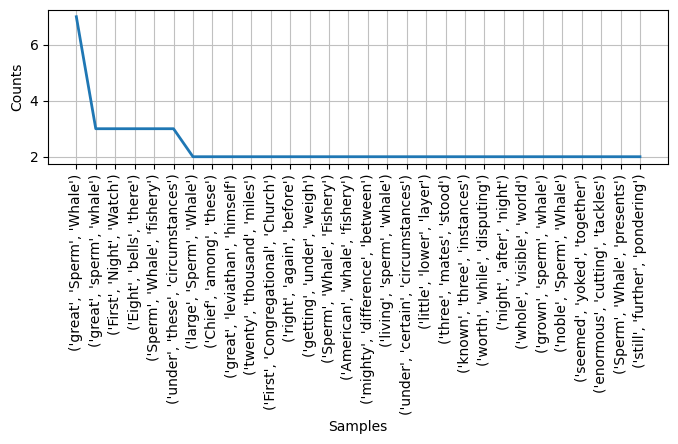

In [45]:
Ngram_book = list(ngrams(book, 3))
Ngram_words = [ngram for ngram in Ngram_book if len(ngram[0]) > th and len(ngram[1]) > th and len(ngram[2]) > th]
fdist = FreqDist(Ngram_words)
apariciones(fdist)


Agrupacion de palabras repetidas


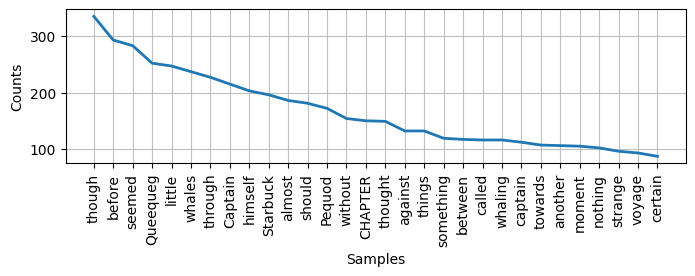

----------------------------------
lista de bigramas
260818
118748
----------------------------------
Agrupacion de bigramas repetidos


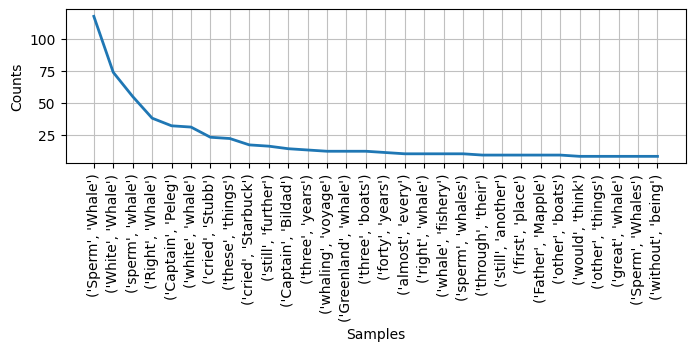

----------------------------------
Agrupacion de trigramas repetidos


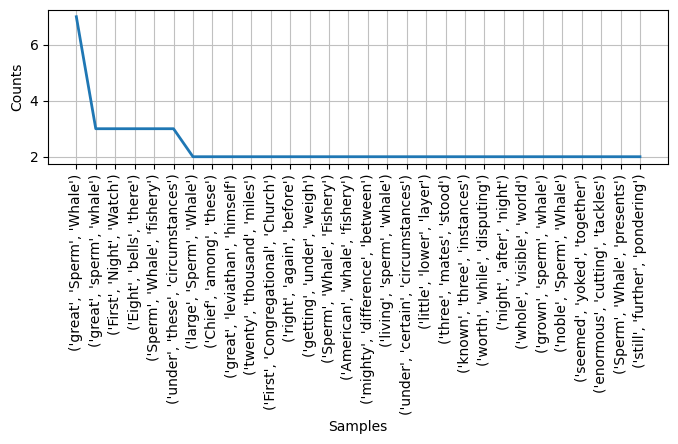

----------------------------------
Agrupacion de cuatrigramas repetidos


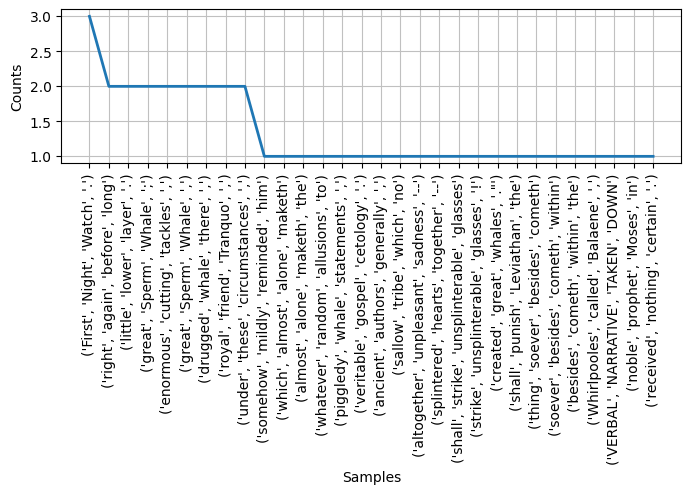

In [73]:
book = text1
print("Agrupacion de palabras repetidas")
long_words = [word for word in book if len(word) > 5]
fdist = FreqDist(long_words)
#print(fdist.most_common(10))
apariciones(fdist)
#frecuencia(fdist)
print("----------------------------------")
print("lista de bigramas")
book_bigrams = list(nltk.bigrams(book))
print(len(book_bigrams))
book_bigrams[:10]
fdist = FreqDist(book_bigrams) # cuantas veces aparece cada par
print(len(fdist))
fdist.most_common(10)
#apariciones(fdist)
#frecuencia(fdist)
print("----------------------------------")
print("Agrupacion de bigramas repetidos")
th = 4
bigrams_words = [bigram for bigram in book_bigrams if len(bigram[0]) > th and len(bigram[1]) > th]
fdist = FreqDist(bigrams_words)
fdist.most_common(10)
apariciones(fdist)
#frecuencia(fdist)
print("----------------------------------")
print("Agrupacion de trigramas repetidos")
Ngram_book = list(ngrams(book, 3))
Ngram_words = [ngram for ngram in Ngram_book if len(ngram[0]) > th and len(ngram[1]) > th and len(ngram[2]) > th]
fdist = FreqDist(Ngram_words)
apariciones(fdist)
print("----------------------------------")
print("Agrupacion de cuatrigramas repetidos")
Ngram_book = list(ngrams(book, 4))
Ngram_words = [ngram for ngram in Ngram_book if len(ngram[0]) > th and len(ngram[1]) > th and len(ngram[2]) > th]
fdist = FreqDist(Ngram_words)
apariciones(fdist)


los Ngram 1 y 2 son colocados en el texto de Moby Dyck 'Great Sperm Whale'

Colocación: grupo de palabras que esta juntas ed manera frecuente

In [74]:
from nltk.collocations import *

In [75]:
bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()

In [76]:
finder = BigramCollocationFinder.from_words(book)
finder.apply_freq_filter(30)
finder.nbest(bigram.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('!"', 'cried'),
 ('each', 'other'),
 (',"', 'cried'),
 ('on', 'board')]

In [77]:
finder = TrigramCollocationFinder.from_words(book)
finder.apply_freq_filter(30)
finder.nbest(trigram.pmi, 10)

[('don', "'", 't'),
 ('won', "'", 't'),
 ('mast', '-', 'heads'),
 ('mast', '-', 'head'),
 ('Aye', ',', 'aye'),
 (',"', 'said', 'I'),
 ('the', 'White', 'Whale'),
 ('the', 'Sperm', 'Whale'),
 ('I', "'", 'll'),
 ('I', 'don', "'")]